In [1]:
%matplotlib inline

* [5 lesser-known Pandas tricks](https://towardsdatascience.com/5-lesser-known-pandas-tricks-e8ab1dd21431)
* [exploratory data analysis](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-508a5e8a5964)
* [examples of BAD & BETTER (timing-wise) Pandas code](https://towardsdatascience.com/how-not-to-write-pandas-code-ef88599c6e8f)
* [display customizations](https://towardsdatascience.com/become-a-pandas-power-user-with-these-display-customizations-6d3a5a5885c1)
* [pandas 1.0 features](https://towardsdatascience.com/5-new-features-in-pandas-1-0-you-should-know-about-fc31c83e396b)

In [2]:
import pandas as pd

## Lesser-Known Pandas Tricks

### Date Ranges

In [3]:
# date ranges - returning a date range, incremented by days
date_from, date_to = "2019-01-01", "2019-01-12"
date_range = pd.date_range(date_from,date_to,freq="D"); date_range

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# transform range into start & end dates
for i, (date_from, date_to) in enumerate(zip(date_range[:-1],
                                            date_range[1:]), 1):
    date_from = date_from.date().isoformat()
    date_to   = date_to.date().isoformat()
    print("%d. date_from: %s, date_to: %s" % (i, date_from, date_to))

1. date_from: 2019-01-01, date_to: 2019-01-02
2. date_from: 2019-01-02, date_to: 2019-01-03
3. date_from: 2019-01-03, date_to: 2019-01-04
4. date_from: 2019-01-04, date_to: 2019-01-05
5. date_from: 2019-01-05, date_to: 2019-01-06
6. date_from: 2019-01-06, date_to: 2019-01-07
7. date_from: 2019-01-07, date_to: 2019-01-08
8. date_from: 2019-01-08, date_to: 2019-01-09
9. date_from: 2019-01-09, date_to: 2019-01-10
10. date_from: 2019-01-10, date_to: 2019-01-11
11. date_from: 2019-01-11, date_to: 2019-01-12


### merge with indicator
* common usage: aligning rows from two dbs

In [5]:
left = pd.DataFrame(
    {"key": ["key1", "key2", "key3", "key4"], "value_l": [1, 2, 3, 4]})

right = pd.DataFrame(
    {"key": ["key3", "key2", "key1", "key6"], "value_r": [3, 2, 1, 6]})

df_merge = left.merge(right, on='key', how='left', indicator=True)
df_merge

,key,value_l,value_r,_merge
0,key1,1,1.0,both
1,key2,2,2.0,both
2,key3,3,3.0,both
3,key4,4,NaN,left_only


In [6]:
# _merge column can be used to check if there is 
# an expected number of rows with values from both DFs

df_merge._merge.value_counts()

both          3
left_only     1
right_only    0
Name: _merge, dtype: int64

### Nearest merges with merge_asof
* enables merging DFs by the nearest key.

In [7]:
quotes = pd.DataFrame(
    [
        ["2016-05-25 13:30:00.023", "GOOG", 720.50, 720.93],
        ["2016-05-25 13:30:00.023", "MSFT", 51.95, 51.96],
        ["2016-05-25 13:30:00.030", "MSFT", 51.97, 51.98],
        ["2016-05-25 13:30:00.041", "MSFT", 51.99, 52.00],
        ["2016-05-25 13:30:00.048", "GOOG", 720.50, 720.93],
        ["2016-05-25 13:30:00.049", "AAPL", 97.99, 98.01],
        ["2016-05-25 13:30:00.072", "GOOG", 720.50, 720.88],
        ["2016-05-25 13:30:00.075", "MSFT", 52.01, 52.03],
    ],
    columns=["timestamp", "ticker", "bid", "ask"],
)
quotes['timestamp'] = pd.to_datetime(quotes['timestamp'])
quotes

,timestamp,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [8]:
trades = pd.DataFrame(
    [
        ["2016-05-25 13:30:00.023", "MSFT", 51.95, 75],
        ["2016-05-25 13:30:00.038", "MSFT", 51.95, 155],
        ["2016-05-25 13:30:00.048", "GOOG", 720.77, 100],
        ["2016-05-25 13:30:00.048", "GOOG", 720.92, 100],
        ["2016-05-25 13:30:00.048", "AAPL", 98.00, 100],
    ],
    columns=["timestamp", "ticker", "price", "quantity"],
)
trades['timestamp'] = pd.to_datetime(trades['timestamp'])
trades

,timestamp,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [9]:
# merge trades & quotes by tickers (last quote can be 10ms behind trade)
# if quote is >10ms behind trade, or quote doesn't exist,
# bid & ask for that quote will be null.

pd.merge_asof(trades, 
              quotes, 
              on="timestamp", 
              by='ticker', 
              tolerance=pd.Timedelta('10ms'), 
              direction='backward')

,timestamp,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


### Create an Excel report
* using pandas with XlsxWriter library
* no more saving to CSV then formatting in excel

In [10]:
df = pd.DataFrame(pd.np.array(
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]]), 
    columns=["a", "b", "c"])

/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [11]:
import xlsxwriter

In [12]:
report_name = 'example_report.xlsx'
sheet_name = 'Sheet1'
writer = pd.ExcelWriter(report_name, engine='xlsxwriter')
df.to_excel(writer, sheet_name=sheet_name, index=False)
writer.save()

In [13]:
!ls 

2019-12-23-few-gotchas-with-pandas.ipynb  random_data.csv  Untitled.ipynb
example_report.xlsx			  random_data.gz


### Add charts to Excel report
* in this case: line chart

In [14]:
workbook = writer.book
worksheet = writer.sheets[sheet_name]

In [15]:
# create a chart line object
chart = workbook.add_chart({'type': 'line'})

In [16]:
# configure the series of the chart from the spreadsheet
# using a list of values instead of category/value formulas:
#     [sheetname, first_row, first_col, last_row, last_col]
chart.add_series({
    'categories': [sheet_name, 1, 0, 3, 0],
    'values':     [sheet_name, 1, 1, 3, 1],
})

In [17]:
# configure the chart axes
chart.set_x_axis({'name': 'Index', 'position_axis': 'on_tick'})
chart.set_y_axis({'name': 'Value', 'major_gridlines': {'visible': False}})

In [18]:
# place the chart on the worksheet
worksheet.insert_chart('E2', chart)

In [19]:
# output the excel file
writer.save()

### Saving disk space
* pandas can read & write compressed datasets.

In [20]:
# create big DF with random numbers
df = pd.DataFrame(pd.np.random.randn(50000,300))

/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [21]:
# if saved as CSV, this would be ~300MB
df.to_csv('random_data.csv', index=False)

In [22]:
# reduce to ~136MB with gzip
df.to_csv('random_data.gz',compression='gzip',index=False)

In [23]:
# reading gzipped data back
df = pd.read_csv('random_data.gz')

## Exploratory Data Analysis

### Setup
* DF with 5 cols, 1000 rows
* attributes: 
    * a1, a2 = random samples, Gaussian; 
    * a3 = random samples from (0,1,2,3,4)
* targets:
    * y1 = numbers evenly spaced, log scale, 0..1
    * y2 = random integers, (0,1)

In [24]:
mu1, sigma1 = 0, 0.1
mu2, sigma2 = 0.2, 0.2
n = 1000
df = pd.DataFrame(
    {
        "a1": pd.np.random.normal(mu1, sigma1, n),
        "a2": pd.np.random.normal(mu2, sigma2, n),
        "a3": pd.np.random.randint(0, 5, n),
        "y1": pd.np.logspace(0, 1, num=n),
        "y2": pd.np.random.randint(0, 2, n),
    }
)

/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys
/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':
/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.np module is deprecated and 

In [25]:
# reset index = adds index col
df.reset_index(inplace=True)
df

,index,a1,a2,a3,y1,y2
0,0,-0.039574,0.003674,4,1.000000,1
1,1,-0.024764,-0.061462,0,1.002308,0
2,2,0.172589,0.167711,1,1.004620,1
3,3,-0.191414,-0.038227,2,1.006939,1
4,4,-0.025469,0.079676,4,1.009262,0
...,...,...,...,...,...,...
995,995,-0.070311,0.345125,4,9.908228,0
996,996,0.028984,0.220479,2,9.931092,0
997,997,0.041607,-0.203080,1,9.954008,1
998,998,0.100529,0.205416,4,9.976978,0


### Plotting setup
* Pandas.plot returns matplotlib.axes.Axes or numpy.ndarray
* add horiz & vert red line to aid visualization

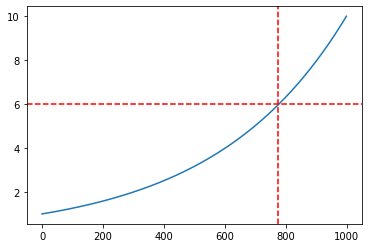

In [26]:
ax = df.y1.plot()
ax.axhline(6, color="red", linestyle="--")
ax.axvline(775, color="red", linestyle="--")

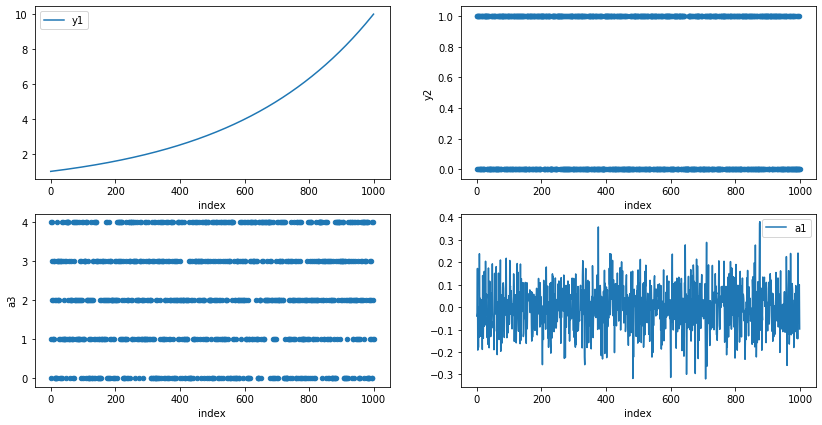

In [27]:
# customize axes
import matplotlib as mpl
fig, ax = mpl.pyplot.subplots(2, 2, figsize=(14,7))
df.plot(x="index", y="y1", ax=ax[0, 0])
df.plot.scatter(x="index", y="y2", ax=ax[0, 1])
df.plot.scatter(x="index", y="a3", ax=ax[1, 0])
df.plot(x="index", y="a1", ax=ax[1, 1])

### Histograms

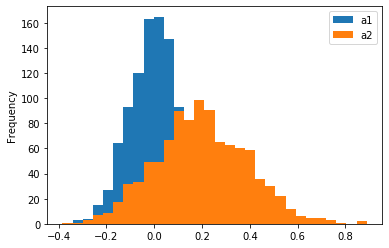

In [28]:
# stacked histograms - enables comparison of multiple distributions on single chart
df[["a1","a2"]].plot(bins=30, kind="hist")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7f53f97b8>,
      dtype=object)

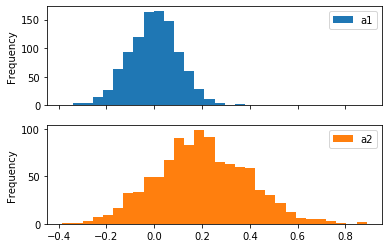

In [29]:
# separate plots using subplots=True
df[["a1", "a2"]].plot(bins=30, kind="hist", subplots=True)

### Probability Density Function (PDF)
* measures relative likelihood of a sample equaling a random variable value
* Pandas *density=1* argument doesn't return a PDF because y-axis is not 0:1 scale
    * [numpy doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html): sum of histogram values != 1 unless unity-width bins are chosen.


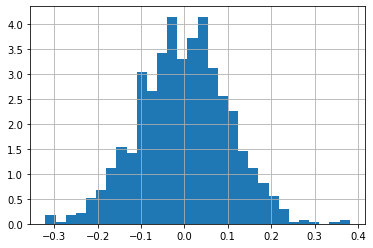

In [30]:
df.a1.hist(bins=30, density=1)

/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


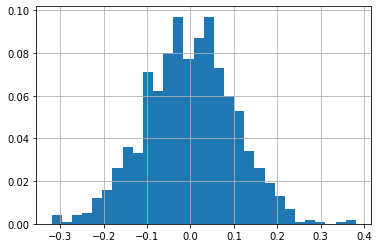

In [31]:
# use weights argument to return a PDF for a variable
weights = pd.np.ones_like(df.a1.values) / len(df.a1.values)
df.a1.hist(bins=30, weights=weights)

### Cume distribution function (CDF)
* counts cume #observations for all bins, up to a specified bin.

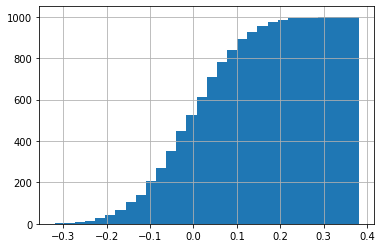

In [32]:
df.a1.hist(bins=30, cumulative=True)

### Plots for groupings

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7c2cf5f28>,
      dtype=object)

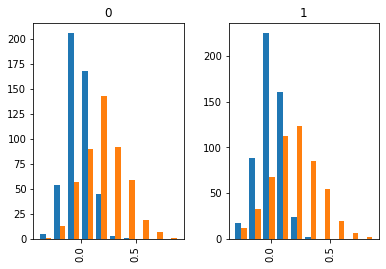

In [33]:
# separate distributions of a1, a2 by y2 (not much diff - randomly gen'd data)
df[['a1','a2']].hist(by=df.y2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7c2bf3da0>,
      dtype=object)

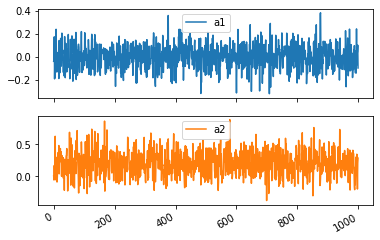

In [34]:
# same for line plots
df[['a1','a2']].plot(by=df.y2, subplots=True)

### Dummy variables
* sometimes needed due to ML algorithms not able to use multivariate attributes (like a3)
* solve this by binarizing the column

In [35]:
df.a3.head()

0    4
1    0
2    1
3    2
4    4
Name: a3, dtype: int64

In [36]:
df_a4_dummy = pd.get_dummies(df.a3, prefix='a3_')
df_a4_dummy.head()

,a3__0,a3__1,a3__2,a3__3,a3__4
0,0,0,0,0,1
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [37]:
# get_dummies also allows dropping a column to avoid storing redundant info
pd.get_dummies(df.a3, prefix="a3_", drop_first=True).head()

,a3__1,a3__2,a3__3,a3__4
0,0,0,0,1
1,0,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


### Line fitting

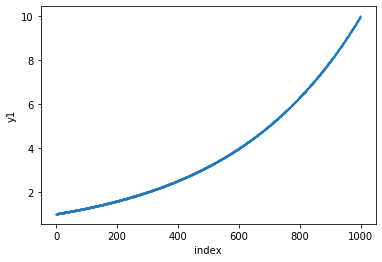

In [38]:
df.plot.scatter(x='index',y='y1',s=1)

In [39]:
# find least-squares solution to linear equation
import numpy as np
df['ones'] = pd.np.ones(len(df))
m,c = pd.np.linalg.lstsq(
    df[['index','ones']], 
    df['y1'], 
    rcond=None)[0]

/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


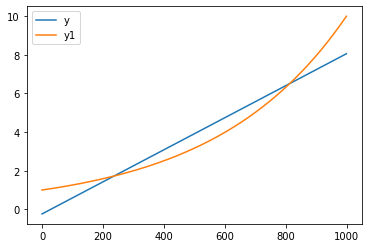

In [40]:
# line equation is y = m*x+c
# find values for line y that best fits y1
df['y'] = df['index'].apply(lambda x: x * m + c)
df[['y','y1']].plot()

## How NOT to write Pandas code

In [41]:
np.random.seed(42) # to make repeatable samples

### sample dataset
* booking info, various cities, random
* id, city, booked_perc (%bookings at a certain time)
* 10K entries

In [42]:
size   = 10000
cities = ["paris", "barcelona", "berlin", "new york"]
df     = pd.DataFrame(
    {"city": np.random.choice(cities, size=size), 
     "booked_perc": np.random.rand(size)}
)

df["id"] = df.index.map(str) + "-" + df.city
df       = df[["id", "city", "booked_perc"]]
df.head()

,id,city,booked_perc
0,0-berlin,berlin,0.393636
1,1-new york,new york,0.473436
2,2-paris,paris,0.854547
3,3-berlin,berlin,0.340004
4,4-berlin,berlin,0.869650


### summing data (BAD):

In [43]:
%%timeit
suma = 0
for _, row in df.iterrows():
    suma += row.booked_perc

1.02 s ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### summing data (MEH):

In [44]:
%%timeit
sum(booked_perc for booked_perc in df.booked_perc)

1.21 ms ± 49 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### summing data (BETTER):

In [45]:
%%timeit
df.booked_perc.sum()

132 µs ± 4.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### filtering data (BAD):

In [46]:
%%timeit
suma = 0
for _, row in df.iterrows():
    if row.booked_perc <= 0.5:
        suma += row.booked_perc

1.08 s ± 22.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### filtering data (BETTER):

In [47]:
%%timeit
df[df.booked_perc <= 0.5].booked_perc.sum()

892 µs ± 44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### adding filters - use parens

In [48]:
%%timeit
df[(df.booked_perc <= 0.5) & (df.city == 'new york')].booked_perc.sum()

1.36 ms ± 44.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### accessing previous values (BAD):

In [49]:
%%timeit
for i in range(1, len(df)):
    df.loc[i, "perc_change"] =  (df.loc[i].booked_perc - df.loc[i - 1].booked_perc) / df.loc[i - 1].booked_perc

9.17 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### accessing previous values (BETTER):

In [50]:
%%timeit
df["perc_change"] = df.booked_perc.pct_change()

935 µs ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


* Pandas often uses __periods__ argument to access statistics based on previous values.

### applying complex functions (BAD):
* below: multiply NY booking_perc by 2, set others to 0, rename column

In [51]:
%%timeit
for i, row in df.iterrows():
    if row.city == 'new york':
        df.loc[i, 'sales_factor'] = row.booked_perc * 2
    else:
        df.loc[i, 'sales_factor'] = 0

4.65 s ± 460 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### applying complex functions (BETTER):
* using apply function directly in a DF

In [52]:
%%timeit
def calculate_sales_factor(row):
    if row.city == 'new york':
        return row.booked_perc * 2
    return 0
df['sales_factor'] = df.apply(calculate_sales_factor, axis=1)

192 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### applying complex functions (BETTER BETTER):
* using Pandas filter & calculating function values directly.

In [53]:
%%timeit 
df.loc[df.city == 'new york', 'sales_factor'] = df[df.city == 'new york'].booked_perc * 2
df.sales_factor.fillna(0, inplace=True)

3.5 ms ± 327 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### handling functions with >=3 variables
* breaking into multi pandas expressions = faster than using apply function

### how to group data (BAD):
* use case: average sales factor by city, first booking id by city

In [54]:
%%timeit 
avg_by_city           = {}
count_by_city         = {}
first_booking_by_city = {}

for i, row in df.iterrows():
    city = row.city
    
    if city in avg_by_city:
        avg_by_city[city]          += row.sales_factor
        count_by_city[city]        += 1
        
    else:
        avg_by_city[city]           = row.sales_factor
        count_by_city[city]         = 1
        first_booking_by_city[city] = row['id']
        
for city, _ in avg_by_city.items():
    avg_by_city[city] /= count_by_city[city]

1.13 s ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### how to group data (BETTER):
* using Pandas *groupby* function

In [55]:
%%timeit
df.groupby('city').sales_factor.mean()
df.groupby('city').sales_factor.count()
df.groupby('city').id.first()

3.9 ms ± 7.41 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Gotchas

### reading multiple files
* glob library - supports regexes
* no need to extract zipped files - pandas does un-archiving for you.

In [56]:
#TODO

### descriptive stats

In [57]:
#TODO

## Reproduceability - Tips

### Display system & package version info

In [58]:
import os, platform
from platform import python_version
import jupyterlab
print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)

System
os name: posix
system: Linux
release: 4.15.0-91-generic

Python
version: 3.6.9

Python Packages
jupterlab==1.1.4
pandas==1.0.3
numpy==1.18.1


* Just say NO to automatic package imports (pandas, numpy, ...)

### always set a seed for randomly generated data
* note: pandas uses numpy, so set set with numpy.

In [59]:
np.random.seed(42)
np.random.random_sample(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [60]:
np.random.random_sample(10)

array([0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914])

In [61]:
np.random.seed(42)
np.random.random_sample(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

## Display customizations
* more info in [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [62]:
import random

In [63]:
# dataset = 2 cols, 100 rows, col1 = random(0,1); col2 = random 200-char sequences

def generate_sentence(n_chars=200):
    return ''.join(random.choice('abcdefg ') for _ in range(n_chars))
n = 100
df = pd.DataFrame(
    {
        "col1": pd.np.random.random_sample(n),
        "text": [generate_sentence() for _ in range(n)]
    }
)
df.shape

/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


(100, 2)

### suppress scientific notation
* default: small & large numbers displayed using exponential notation

In [64]:
# replace 1st value in col1 with small number
df.iloc[0,0] = 1e-10
df.head()

,col1,text
0,1.000000e-10,gcccbbggefbefcbfdg cfgd b aa ad caada dgebb...
1,9.699099e-01,cga eefdbd facagf dagcegbbbgdaegfb cfagac egf...
2,8.324426e-01,dgbdcag e becfabdb geacec eec acbbedaebg bffa...
3,2.123391e-01,dbe bef fffg a fbdaf gagafgbbc ffafcgf fabdg ...
4,1.818250e-01,dcaafbfg ffbeagfgf ggaaeccggbddaeggad fbebabc...


In [65]:
pd.options.display.float_format = '{:,.10f}'.format
df.head()

,col1,text
0,0.0000000001,gcccbbggefbefcbfdg cfgd b aa ad caada dgebb...
1,0.9699098522,cga eefdbd facagf dagcegbbbgdaegfb cfagac egf...
2,0.8324426408,dgbdcag e becfabdb geacec eec acbbedaebg bffa...
3,0.2123391107,dbe bef fffg a fbdaf gagafgbbc ffafcgf fabdg ...
4,0.1818249672,dcaafbfg ffbeagfgf ggaaeccggbddaeggad fbebabc...


In [66]:
pd.reset_option('display.float_format')
df.head()

,col1,text
0,1.000000e-10,gcccbbggefbefcbfdg cfgd b aa ad caada dgebb...
1,9.699099e-01,cga eefdbd facagf dagcegbbbgdaegfb cfagac egf...
2,8.324426e-01,dgbdcag e becfabdb geacec eec acbbedaebg bffa...
3,2.123391e-01,dbe bef fffg a fbdaf gagafgbbc ffafcgf fabdg ...
4,1.818250e-01,dcaafbfg ffbeagfgf ggaaeccggbddaeggad fbebabc...


### changing max number of displayed rows/columns (20 = default for cols)

In [67]:
# transform rows to cols to viz the problem
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
col1,1e-10,0.96991,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,...,0.0314292,0.63641,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.0769799
text,gcccbbggefbefcbfdg cfgd b aa ad caada dgebb...,cga eefdbd facagf dagcegbbbgdaegfb cfagac egf...,dgbdcag e becfabdb geacec eec acbbedaebg bffa...,dbe bef fffg a fbdaf gagafgbbc ffafcgf fabdg ...,dcaafbfg ffbeagfgf ggaaeccggbddaeggad fbebabc...,ebgbeeebc gcbfbe caefb fbaf adabdagbec cgdaa ...,fdc gcgcbad gbcec abbababc eddcbfdgdagd f de...,cabddgabaccafgeffgccffdcf gecbabfcg bagc gcc ...,bbcbf bf ddddfcg gaedff aeefcgdcgedegcg acgfbd...,bagfaa ccgf ddf dcf cdfaaccggfdecdadfbggbgge...,...,eegcgb ddccfg ecbagabfbe ebaacae cb e f bbgef...,bgd gdef fccadfgagc cd edgabdgbe aabcefdced e ...,aadgbebecgagaeafc gfbgdadgbgbgacdacgedafcg bgd...,f bf ecaefb g caaebcbefbcgaffgcff ddacea acc ...,fbebcfa bcacbaecbfebacbf bcbaebfbggaaggeagcada...,egee eecbabdfcdagfefdfbcbaeecf debgbaedbdbgdeg...,egcddf bcbeaeeadf c f bgecf dbbafebefcaga aeeg...,b dfefbcgc bf ddcgedagaafae acb ea bb dbd fgg...,cbbg cc abbabfffg c dbgeeef gc cgf adffaceeega...,ac bc g dgdbg cggffabcgeeeeab ddabececcc fegb...


In [68]:
# set max cols = 100
pd.set_option("display.max_columns", 100)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
col1,1e-10,0.96991,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,0.45607,0.785176,0.199674,0.514234,0.592415,0.0464504,0.607545,0.170524,0.0650516,0.948886,0.965632,0.808397,0.304614,0.0976721,0.684233,0.440152,0.122038,0.495177,0.0343885,0.90932,0.25878,0.662522,0.311711,0.520068,0.54671,0.184854,0.969585,0.775133,0.939499,0.894827,0.5979,0.921874,0.0884925,0.195983,0.0452273,0.32533,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.0745506,0.986887,0.772245,0.198716,0.00552212,0.815461,0.706857,0.729007,0.77127,0.0740447,0.358466,0.115869,0.863103,0.623298,0.330898,0.0635584,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.0254191,0.107891,0.0314292,0.63641,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.0769799
text,gcccbbggefbefcbfdg cfgd b aa ad caada dgebb...,cga eefdbd facagf dagcegbbbgdaegfb cfagac egf...,dgbdcag e becfabdb geacec eec acbbedaebg bffa...,dbe bef fffg a fbdaf gagafgbbc ffafcgf fabdg ...,dcaafbfg ffbeagfgf ggaaeccggbddaeggad fbebabc...,ebgbeeebc gcbfbe caefb fbaf adabdagbec cgdaa ...,fdc gcgcbad gbcec abbababc eddcbfdgdagd f de...,cabddgabaccafgeffgccffdcf gecbabfcg bagc gcc ...,bbcbf bf ddddfcg gaedff aeefcgdcgedegcg acgfbd...,bagfaa ccgf ddf dcf cdfaaccggfdecdadfbggbgge...,faddfcaefc adefagdgdcabcdacccc cafaaegdgcbffc...,gefcccfdgb baedbcaaeed gbbadegafcdgbdecegbdd d...,ac bg affffcfeg cbbfbadeaccfgg eaaccfgeedddef...,fdc g ecaebacfcbdf bba cabbga ba degfegb bcf...,fadcgc cbeafceddbcgaebeceddcecgfaaa bac fbf af...,geabedadeeg ddaedb bb ddebb g cfd ff c afacf...,cdaecdedgebdeadb abfe fegb aebfcadb c cdcdffab...,abdcddb eadadeggcgeg gafggf ebbcd cb aagfeaaga...,eebbdbcgg ffeg fgddea cgfgceegca abcedbeebebff...,fgbgeagggdd bbecbea ffdaaedbfcabebaefcgabcf fg...,fafbfbcdgbe decbecggba dfa eccb fcafcaa fdf ff...,bacagccgcbaba dfdffa bcdeeggdcgd b dgggcb cbb ...,cd gebbdacacdefdgdbebedadddaccfcaegeafa fbf ac...,aa ge f gfegaff efgbaddfcdagbadf b c bd deg...,bcbc g feeg bfcbcgcbea efga fbfdebbefg efc cg...,caffcgeb aefdgadccgbbebggcbgebgd bffcgadbggg c...,gabgffe db bb df faaccadf bgdf fabddbdbgc fdf...,cggcf debcf ce a egdaa fe bgede da ddfcg aafa ...,gbagbb cceaebfeeggaffcaagfecfdecdebefddebfb b...,aecge gdbfacabd ccfaaggafccaabdbdfa d ggb c g ...,g eegcbgfeaadbaegecd gceacgef dabdgedade dge...,fa dc b eaba bedff e fgdcadccfgc egcdddb gafbe...,fgg degffgb g efc db fcefaf ddgbgefdd fbd cba...,dacfaaeafgf a be gfacbag cbagbdg cebaegccg a a...,bdcg da cdaceedeedg ce bfbgedbfebagefcfe deacf...,g aeccd g dgeeae geebgad b gbe aabg ga deagba...,dbcgbebfcffc bbfgefec agfbdegb dc gfffdb bda f...,ace dgfgb dgacegdgecacdgcc cfdge efageb deaec...,bb geeafad eccbdfeacbgfefbefgfbbfgacffb gegfa...,ec gaebacb cadgecccbagegd fffbbgabaeaebeedfdc...,cddc dfg faad bdefabeec eeae dbaefadcdd facd...,fceefc dabcfeafecbcge facdeeecbeadfffedf af...,fdf agb gb eeaf daefgafcb gg deaebdceaedgf ga...,fggadfdccfede bbd aabgdfcaagaadcbgegacabfeeg f...,ggabg e dffcdadbgcgfdfffdaadgd dbcg f fgebgeb...,baaeefbe cbggffgged geddggadcdceagddfafbfcgag...,aff ccggdabbcgfecdcefgbagbgad adg bg dacgagb...,egaeeabedcbdbfcacbbeeagbcbdegcbfafcfbdgb c fd...,fagbgdb aebcdgf afeec ddfebaad geegfaecbceccbg...,badecffebaa dcaebf bceebbaadcceeef ggceefeffa...,gcbaffe dbab caacabe fgb gbdg b edgg aa b bfd...,db efcbfgaddccggafcbf gecebcafeg c c ebba e...,feae gfcgfec beeeb ge cf gg fcagd ebdbbgcebaa...,ggdfdfdefeddg agdfac ddddab cabceg dffegfgfeg ...,gaddfdfdbegdgdbgfcdbageabg da cdd aeeaac ec cd...,gdcfceeadgcdgfddadfggcfgbecfef ggbdcagcebaacec...,ecaaffdg caeeaegc cecefeacccaa ecfeggdbff g cg.

### expand column width

In [69]:
pd.set_option('max_colwidth',500)
df

,col1,text
0,1.000000e-10,gcccbbggefbefcbfdg cfgd b aa ad caada dgebb dfbaca afee gdecag aeebdfa baggcc bffff cgg adcb ccdgbggbcbe beb fedead dgebade gdcfdaadbceddb gee bcabe aaeefcacddag bf agafddg aggeagbfbgfgb bd g d
1,9.699099e-01,cga eefdbd facagf dagcegbbbgdaegfb cfagac egffdbg daecdebffcfffc gcb agbeg gcadcfae dfdagad gdeabdbeebdeaagfd dgdegcegededebdbafa defbfaf fe decgggc ae eb agacad eedb gac afdfec eafececcfbcaaegebdbfe
2,8.324426e-01,dgbdcag e becfabdb geacec eec acbbedaebg bffafggcfbf ddgadbaaaccdddbcbee f bdbfb fecbedfgcaaeffebeg cfeefef g ffe acaggag gd afcdfcacfacbc eag bgeaeagba fgbcedgccaebcdedgd feecbcagaacdddcdb cdgc ge
3,2.123391e-01,dbe bef fffg a fbdaf gagafgbbc ffafcgf fabdg gaf bcbbbcgggd ffbgabgaa dfdcgdgacdgbf fedcbgddcgaaaffc gggbfacfefaacgg g gac adbegfedg aaf gcbfcdfedec bbcfgegcbcaafedeagc ggceggffcbddedadbd dfabdgbfbc
4,1.818250e-01,dcaafbfg ffbeagfgf ggaaeccggbddaeggad fbebabcadfagdgfcegcd afafece fbedaf bgeaadegcag cbdg ac cgffccf dfggeg bbd cfaeebgbbbd ggfgbfccgbbg ga babgaeead cgefeadbgageabdcbbadface fagefafdgebccedcdcg
...,...,...
95,2.492922e-01,egee eecbabdfcdagfefdfbcbaeecf debgbaedbdbgdegaebbegeafbfcgadggbggcffabedd bdbebfeedba ffdebceea adcggdcdfbcacbfaedbgbbdfbfacfg abffabaadaaae aagbdceadfadae ceffecgaffegabccbdc bcefaafdeaaa bdcaedafc
96,4.103829e-01,egcddf bcbeaeeadf c f bgecf dbbafebefcaga aeeggggc afadgc ccagfcb edce aafbcfbdb fdacgc gcgdffggcded g ddac efgeeabacfded dbcf caeggbddg geacecaff b dcbbe ecacdccagcebcagcgfa dgdebcafcbgcgabg b ae bf
97,7.555511e-01,b dfefbcgc bf ddcgedagaafae acb ea bb dbd fgggbggbcaefgaebdfbfbbgfgecfgdbadcgbbdgcccbafc daece fa fabfbcd cbefdfgbff ga dbgffgd cd eagdecbcebdeddgacf degd ceab acddccdcgcfccc eddd cbcgdecgfdb cfecdb
98,2.287982e-01,cbbg cc abbabfffg c dbgeeef gc cgf adffaceeegacbeegdbgdfdcdfgce gfgeccdbcadfb bddg ede f cae adcaa beefacf dfgacc beb ec bbdgdb gg b aecfeeecbgdbdbcebccbeggadfa b afbe aecaecfa ccf aea gccaegeagbcd


### dataframe info
* info option similar to describe function. good when using large datasets.

In [70]:
pd.set_option('large_repr','info')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    100 non-null    float64
 1   text    100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB

## Pandas 1.0 features

In [71]:
import pandas as pd
print("pandas==%s" % pd.__version__)

pandas==1.0.3


### dynamic window functions
* below: calculate moving average until current number <=10

In [72]:
df = pd.DataFrame({'col1': [1, 2, 3, 10, 2, 3, 11, 2, 3, 12, 1, 2]})
df

,col1
0,1
1,2
2,3
3,10
4,2
5,3
6,11
7,2
8,3
9,12


In [73]:
use_expanding =  (df.col1 >= 10).tolist()
use_expanding

[False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False]

* need to design a custom indexer from pandas' BaseIndexer class
* uses get_window_bounds function -> calcs start & end for each window

In [74]:
from pandas.api.indexers import BaseIndexer

class CustomIndexer(BaseIndexer):
    
    def get_window_bounds(self, num_values, min_periods, center, closed):
        
        start   = np.empty(num_values, dtype=np.int64)
        end     = np.empty(num_values, dtype=np.int64)
        start_i = 0
        
        for i in range(num_values):
            if self.use_expanding[i]:
                start[i] = start_i
                start_i  = end[i] = i + 1
            else:
                start[i] = start_i
                end[i]   = i + self.window_size
                
        print('start', start)
        print('end', end)
        return start, end
    
indexer = CustomIndexer(window_size=1, use_expanding=use_expanding)

In [75]:
# put indexer class into rolling function, find mean for each window.
df.rolling(indexer).mean()

start [ 0  0  0  0  4  4  4  7  7  7 10 10]
end [ 1  2  3  4  5  6  7  8  9 10 11 12]


,col1
0,1.000000
1,1.500000
2,2.000000
3,4.000000
4,2.000000
5,2.500000
6,5.333333
7,2.000000
8,2.500000
9,5.666667


### faster (via cython) rolling apply
* pandas 1.0 allows spec'ing Numba as execution engine
* numba has to be installed
* first-time execution slower - numba has function compilation overhead
* *raw* should be set to True (function will see numpy objects, not pandas series, for better performance)

In [76]:
# create DF with 1M values
df = pd.DataFrame({"col1": pd.Series(range(1_000_000))})
df.head()

,col1
0,0
1,1
2,2
3,3
4,4


In [77]:
# function: finds sum, adds 5
def some_function(x):
    return np.sum(x) + 5

In [79]:
%%timeit
df.col1.rolling(100).apply(some_function, engine='cython', raw=True)

5.22 s ± 568 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
%%timeit
df.col1.rolling(100).apply(some_function, engine='numba', raw=True)

528 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### new NA value - help with representing scalar missing values
* goal = provide consistency across data types.
* used by Int64 boolean, string

In [81]:
# series of integers
s = pd.Series([3, 6, 9, None], dtype="Int64")
s

0       3
1       6
2       9
3    <NA>
dtype: Int64

In [82]:
# NA==NA returns NA; np.nan==np.nan return False
s.loc[3]==s.loc[3]

<NA>

In [83]:
np.nan==np.nan

False

### new, dedicated string type 
* prior to 1.0, strings stored as objects.
* couldn't be sure if series (below) contains just strings or mixed with other datatypes.

In [84]:
s = pd.Series(['an', 'ban', 'pet', 'podgan', None]); s

0        an
1       ban
2       pet
3    podgan
4      None
dtype: object

In [85]:
s = pd.Series(['an', 'ban', 'pet', 'podgan', None], dtype='string'); s

0        an
1       ban
2       pet
3    podgan
4      <NA>
dtype: string

### ignoring index on a sorted DF
* when you sort a DF by a certain column the index also is sorted.
* don't always want that.
* pandas 1.0 uses ignore index to manage it.

In [86]:
df = pd.DataFrame({"col1": [1, 3, 5, 2, 3, 7, 1, 2]})
df.sort_values('col1')

,col1
0,1
6,1
3,2
7,2
1,3
4,3
2,5
5,7


In [87]:
df.sort_values('col1', ignore_index=True)

,col1
0,1
1,1
2,2
3,2
4,3
5,3
6,5
7,7


## TODO: [pandas live analytics server (based on Flask)](https://towardsdatascience.com/pandas-analytics-server-d9abceec888b)